In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('dataset.csv')
df.columns = [i for i in range(df.shape[1])]
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.680383,0.613981,3.059372e-07,0.631488,0.626398,-0.018287,0.570026,0.593852,-0.031702,0.526253,...,0.711045,0.361207,-0.085143,0.729198,0.314285,-0.092042,0.743926,0.269934,-0.092306,X Rotation
1,0.679469,0.597870,2.715410e-07,0.631742,0.611410,-0.019363,0.571141,0.580386,-0.031950,0.529361,...,0.710538,0.347078,-0.082701,0.729378,0.300005,-0.092737,0.744474,0.255069,-0.095824,X Rotation
2,0.682319,0.587922,2.516343e-07,0.633236,0.600756,-0.020622,0.570903,0.569600,-0.034163,0.527723,...,0.710324,0.334601,-0.081366,0.728545,0.287340,-0.090967,0.743676,0.243357,-0.093449,X Rotation
3,0.091503,0.639092,-4.300997e-08,0.140116,0.631102,-0.045517,0.186982,0.594512,-0.075185,0.188614,...,0.057598,0.487450,-0.085956,0.071097,0.543149,-0.079358,0.085163,0.549699,-0.065695,X Rotation
4,0.693377,0.582666,2.104806e-07,0.644344,0.595071,-0.016234,0.581066,0.561960,-0.026244,0.539702,...,0.721159,0.329552,-0.079044,0.738889,0.283230,-0.088691,0.754178,0.240345,-0.091967,X Rotation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3294,0.198067,0.931680,6.510395e-07,0.254992,0.919036,-0.031481,0.300829,0.889855,-0.052322,0.293115,...,0.197475,0.847752,-0.104302,0.224383,0.901408,-0.107817,0.242893,0.936155,-0.097488,Z scale
3295,0.196104,0.937055,5.985465e-07,0.252963,0.922967,-0.029314,0.298261,0.895205,-0.050163,0.293097,...,0.196358,0.853833,-0.103045,0.219946,0.906047,-0.104433,0.235188,0.939565,-0.093604,Z scale
3296,0.191732,0.952788,5.538436e-07,0.250759,0.940382,-0.028585,0.295980,0.914224,-0.049165,0.290581,...,0.199166,0.868105,-0.104216,0.224071,0.918845,-0.107274,0.240962,0.952501,-0.097889,Z scale
3297,0.195530,0.956599,5.997990e-07,0.251016,0.944863,-0.029891,0.296636,0.919917,-0.050970,0.290165,...,0.193023,0.877515,-0.100808,0.217293,0.927753,-0.101157,0.233440,0.958393,-0.089842,Z scale


In [3]:
df = df.rename(columns={63: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.680383,0.613981,3.059372e-07,0.631488,0.626398,-0.018287,0.570026,0.593852,-0.031702,0.526253,...,0.711045,0.361207,-0.085143,0.729198,0.314285,-0.092042,0.743926,0.269934,-0.092306,X Rotation
1,0.679469,0.597870,2.715410e-07,0.631742,0.611410,-0.019363,0.571141,0.580386,-0.031950,0.529361,...,0.710538,0.347078,-0.082701,0.729378,0.300005,-0.092737,0.744474,0.255069,-0.095824,X Rotation
2,0.682319,0.587922,2.516343e-07,0.633236,0.600756,-0.020622,0.570903,0.569600,-0.034163,0.527723,...,0.710324,0.334601,-0.081366,0.728545,0.287340,-0.090967,0.743676,0.243357,-0.093449,X Rotation
3,0.091503,0.639092,-4.300997e-08,0.140116,0.631102,-0.045517,0.186982,0.594512,-0.075185,0.188614,...,0.057598,0.487450,-0.085956,0.071097,0.543149,-0.079358,0.085163,0.549699,-0.065695,X Rotation
4,0.693377,0.582666,2.104806e-07,0.644344,0.595071,-0.016234,0.581066,0.561960,-0.026244,0.539702,...,0.721159,0.329552,-0.079044,0.738889,0.283230,-0.088691,0.754178,0.240345,-0.091967,X Rotation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3294,0.198067,0.931680,6.510395e-07,0.254992,0.919036,-0.031481,0.300829,0.889855,-0.052322,0.293115,...,0.197475,0.847752,-0.104302,0.224383,0.901408,-0.107817,0.242893,0.936155,-0.097488,Z scale
3295,0.196104,0.937055,5.985465e-07,0.252963,0.922967,-0.029314,0.298261,0.895205,-0.050163,0.293097,...,0.196358,0.853833,-0.103045,0.219946,0.906047,-0.104433,0.235188,0.939565,-0.093604,Z scale
3296,0.191732,0.952788,5.538436e-07,0.250759,0.940382,-0.028585,0.295980,0.914224,-0.049165,0.290581,...,0.199166,0.868105,-0.104216,0.224071,0.918845,-0.107274,0.240962,0.952501,-0.097889,Z scale
3297,0.195530,0.956599,5.997990e-07,0.251016,0.944863,-0.029891,0.296636,0.919917,-0.050970,0.290165,...,0.193023,0.877515,-0.100808,0.217293,0.927753,-0.101157,0.233440,0.958393,-0.089842,Z scale


In [4]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (3299, 63)
Labels shape = (3299,)


In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
svm = SVC(C=10, gamma=0.1, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=10, gamma=0.1)

In [6]:
y_pred = svm.predict(x_test)
y_pred

array(['Y Rotation', 'X Rotation', 'X scale', 'Z Rotation', 'Z Rotation',
       'Y Rotation', 'X Rotation', 'Y Rotation', 'Z Rotation', 'Z scale',
       'Z Rotation', 'X scale', 'Y scale', 'Z Rotation', 'X Rotation',
       'Y scale', 'Z Rotation', 'Z Rotation', 'Z scale', 'X Rotation',
       'X scale', 'Z Rotation', 'X scale', 'Z Rotation', 'X Rotation',
       'X scale', 'Y scale', 'X Rotation', 'Y Rotation', 'Y scale',
       'Y Rotation', 'X scale', 'Z scale', 'X scale', 'Y Rotation',
       'Y scale', 'Y scale', 'Y Rotation', 'Y scale', 'X scale',
       'X Rotation', 'Z Rotation', 'Z scale', 'Z scale', 'Y Rotation',
       'Z Rotation', 'X scale', 'Z Rotation', 'Z Rotation', 'Y scale',
       'Z scale', 'Z scale', 'Y Rotation', 'X scale', 'Z scale',
       'Z Rotation', 'Z scale', 'X scale', 'Z Rotation', 'Z Rotation',
       'Z scale', 'Z scale', 'Z scale', 'Z Rotation', 'Y Rotation',
       'Y scale', 'X scale', 'X Rotation', 'Z scale', 'Z Rotation',
       'Z Rotation', 'X 

In [7]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
f1, recall, precision

(0.9075757575757576, 0.9075757575757576, 0.9075757575757576)

<AxesSubplot:title={'center':'Confusion Matrix - American Sign Language'}>

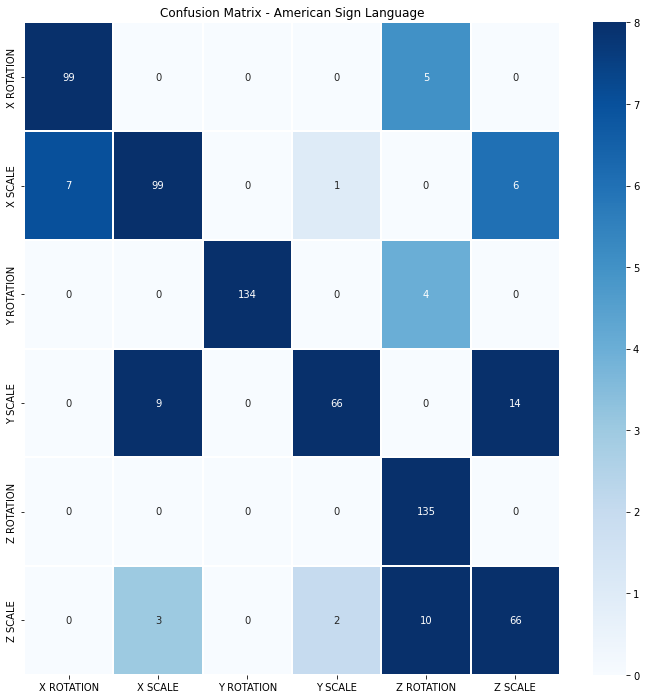

In [8]:
labels = sorted(list(set(df['Output'])))
labels = [x.upper() for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - American Sign Language")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [9]:
import pickle

# save model
with open('model.pkl','wb') as f:
    pickle.dump(svm,f)